In [1]:
import snowflake.connector
from snowflake.connector import cursor
import usaddress
import re
import seaborn as sns
import matplotlib.pyplot as plt
ctx = snowflake.connector.connect(
    user='',
    password='',
    account=''
    )

cursor = ctx.cursor()
import pandas as pd
sql_MLS = """SELECT (CASE WHEN CC_PROPERTY_ADDR_DISPLAY_1 IS NULL THEN ADDRESS ELSE CC_PROPERTY_ADDR_DISPLAY_1 END) AS MLS_ADDRESS,
                    OWNER_FULL_NAME AS NAME,
                    CC_PROPERTY_ADDR_POSTAL_CODE AS POSTALCODE
            FROM ATTOM.MLS
            WHERE CC_PROPERTY_ADDR_CITY = 'new york'"""

sql_ASSESSOR = """SELECT SITUSFULLSTREETADDRESS AS ASSESSOR_ADDRESS,
                         OWNERNAME1FULL,
                         OWNERNAME2FULL,
                         SITUSZIP5,
                         LandUseCode,CountyLandUseCode,zoning
                  FROM DATATREE.ASSESSOR
                  WHERE SITUSCITY = 'new york'"""

In [2]:
df_MLS = pd.read_sql(sql_MLS, con=ctx)
df_ASSESSOR = pd.read_sql(sql_ASSESSOR, con=ctx)
df_MLS.dropna(subset=['MLS_ADDRESS'], inplace=True)
df_ASSESSOR.dropna(subset=['ASSESSOR_ADDRESS'], inplace=True)
df_merge_node1 = pd.merge(df_ASSESSOR,df_MLS, how = 'left', right_on = ['MLS_ADDRESS', 'POSTALCODE'], 
                          left_on = ['ASSESSOR_ADDRESS', 'SITUSZIP5'])
matched_df   = df_merge_node1[df_merge_node1['MLS_ADDRESS'].notnull()]
remaining_df = df_merge_node1[df_merge_node1['MLS_ADDRESS'].isnull()][df_ASSESSOR.columns.tolist()]

### Check the PROPERTY INFORMATION for the mismatched ASSESSOR Table
- LandUseCode: A First American  established Land Use code converted from various county Land Use codes.  Land Use code standardized for all counties. https://montcopa.org/DocumentCenter/View/1166/Land-Use-Codes?bidId=
- StateLandUseCode: Land Use as established by the State.
- CountyLandUseCode: Land Use as established by the County
- Zoning: Zoning of a property as assigned by the assessor of a municipality.

- https://www.lakecopropappr.com/pdfs/2019%20Land%20Use%20Codes_ADA.pdf
- 1005 VACANT COMMERCIAL UNBUILDABLE
- 1004 COMMERCIAL COMMON ELEMENTS/AREA
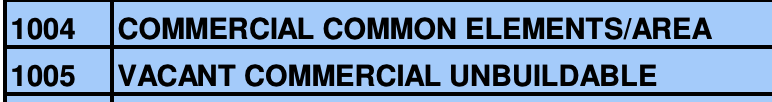
- 1100 STORE 1 STORY FREE STANDING

In [3]:
landusecode = remaining_df['LANDUSECODE'].value_counts()
countylandusecode = remaining_df['COUNTYLANDUSECODE'].value_counts()
zoning = remaining_df['ZONING'].value_counts()

<AxesSubplot:>

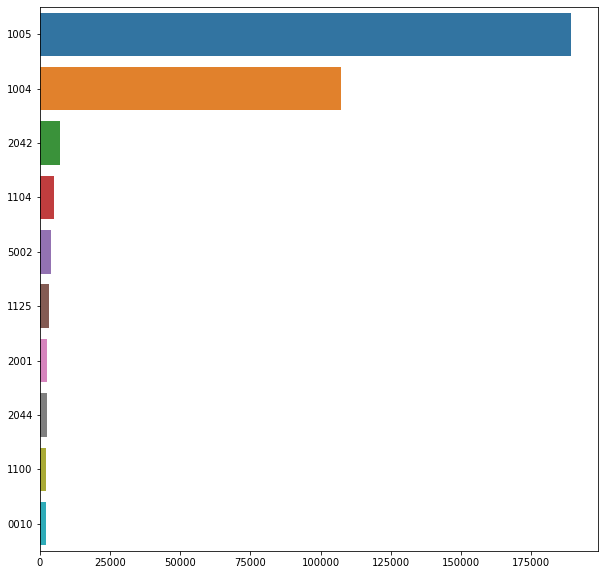

In [4]:
x = landusecode.index.tolist()[:10]
y = landusecode.tolist()[:10]
plt.rcParams['figure.figsize']=10,10
sns.barplot(x=y,y=x)
#need further documentation 
#1005 over 50%

<AxesSubplot:>

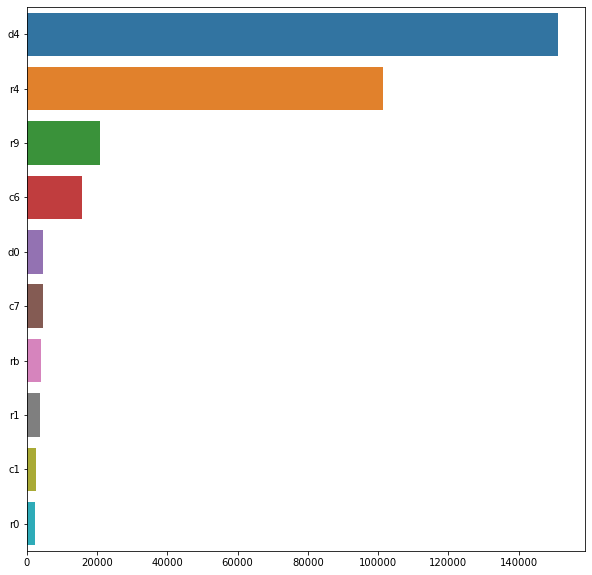

In [5]:
x = countylandusecode.index.tolist()[:10]
y = countylandusecode.tolist()[:10]
plt.rcParams['figure.figsize']=10,10
sns.barplot(x=y,y=x)

<AxesSubplot:>

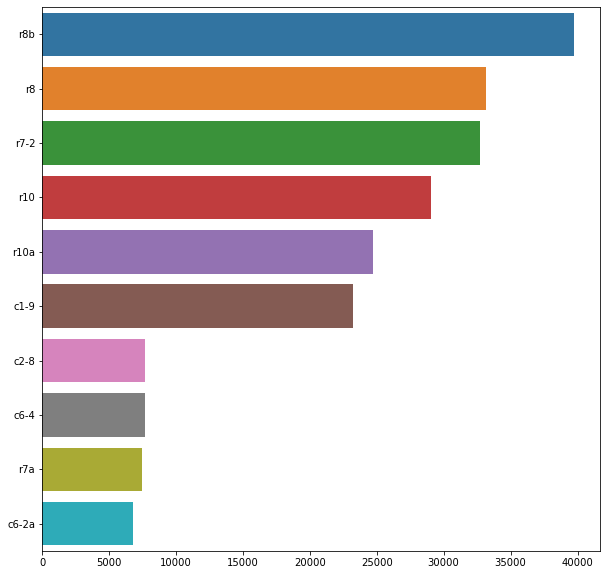

In [6]:
x = zoning.index.tolist()[:10]
y = zoning.tolist()[:10]
plt.rcParams['figure.figsize']=10,10
sns.barplot(x=y,y=x)